In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyfits


In [17]:
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence

In [18]:
from python.convert_decals_data import ConvertDecals

In [19]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(32, 12))
    if range is None:
        range = [np.min(img), np.max(img)]
#     img_use = np.clip(img, range[0], range[1])
    img_use = img.copy()
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
#     if preserve_scale:
#         img_use[0,0] = range[0]
#         img_use[-1,-1] = range[1]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow, clim=range)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [20]:
dir_base = '/Users/sullivan/LSST/DATA/DECaLSimgs/'
dir_g = 'Cutouts2'
dir_coord1 = '40.53_-0.471918/'
dir_coord2 = '41.2180_-0.55497/'
prefix = 'sdss'
id1 = '1712'
id2 = '3977'
id = id1
dir_coord = dir_coord1
directory= dir_base + dir_g + '/' + dir_coord + '/'
Converter = ConvertDecals(directory=directory, prefix=prefix, id=id)

In [43]:
obsid_list = Converter.convert()

Working on sdsscutout1712a.fits
Rough PSF width: 2.883598
Zenith angle: 38.426082
Rotation angle: 28.160926
Working on sdsscutout1712b.fits
Rough PSF width: 4.239827
Zenith angle: 35.846670
Rotation angle: 20.610836
Working on sdsscutout1712c.fits
Rough PSF width: 3.662443
Zenith angle: 42.584762
Rotation angle: 35.995902
Working on sdsscutout1712d.fits
Rough PSF width: 5.417351
Zenith angle: 32.794986
Rotation angle: -0.014156
Working on sdsscutout1712e.fits
Rough PSF width: 3.480761
Zenith angle: 34.435056
Rotation angle: 14.175291
Working on sdsscutout1712f.fits
Rough PSF width: 5.502541
Zenith angle: 41.819682
Rotation angle: 34.782882
Working on sdsscutout1712g.fits
Rough PSF width: 3.482673
Zenith angle: 39.411128
Rotation angle: 30.364536
Working on sdsscutout1712h.fits
Rough PSF width: 3.685167
Zenith angle: 37.047490
Rotation angle: 24.537674


In [44]:
obsid_list

[1, 2, 4, 6, 7]

In [57]:
obsid_list = [1, 2, 3, 4, 5, 6, 7]

In [23]:
filter_name = 'g'
repository = '/Users/sullivan/LSST/DATA/DECaLSimgs/output_data'

In [24]:
from python.buildDcrCoadd import BuildDcrCoadd
from python.generateTemplate import GenerateTemplate

In [58]:
self = BuildDcrCoadd(n_step=3, input_repository=repository, obsids=obsid_list, filter_name=filter_name,
                     warp=False, debug_mode=False)

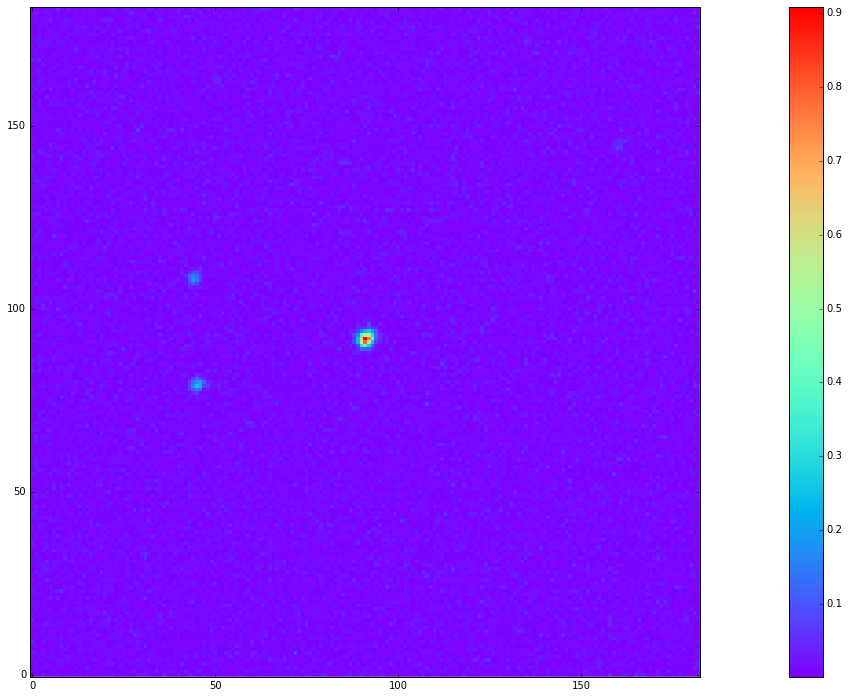

In [46]:
look(self.exposures[1].getMaskedImage().getVariance().getArray())

In [59]:
self.build_model(max_iter=10, frequency_regularization=False, test_convergence=True, min_iter=5, use_variance=False,
                 refine_solution=True)

Calculating initial solution... Done!
Fractional change per iteration:
Full initial convergence metric:  [ 0.3294135   0.34048957  0.31345198  0.29427826  0.37524034  0.32183886
  0.42253357]
Iteration 0: delta=0.651400
Full convergence metric: [ 0.33062466  0.31775607  0.34886219  0.29811031  0.39033735  0.29781132
  0.3905799 ]
Convergence metric: 0.339155
Iteration 1: delta=0.302854
Full convergence metric: [ 0.32739834  0.32651861  0.32946014  0.29604098  0.37987569  0.30525812
  0.40240992]
Convergence metric: 0.338137
Iteration 2: delta=0.190439
Full convergence metric: [ 0.32818197  0.32128877  0.33699309  0.296952    0.38453741  0.30024152
  0.39468849]
Convergence metric: 0.337555
Iteration 3: delta=0.145682
Full convergence metric: [ 0.32715995  0.32309789  0.33170404  0.29635289  0.38218517  0.30218383
  0.39733374]
Convergence metric: 0.337145
Iteration 4: delta=0.119493
Full convergence metric: [ 0.32738358  0.32156765  0.33350353  0.2966102   0.38345545  0.30098034
  0.39

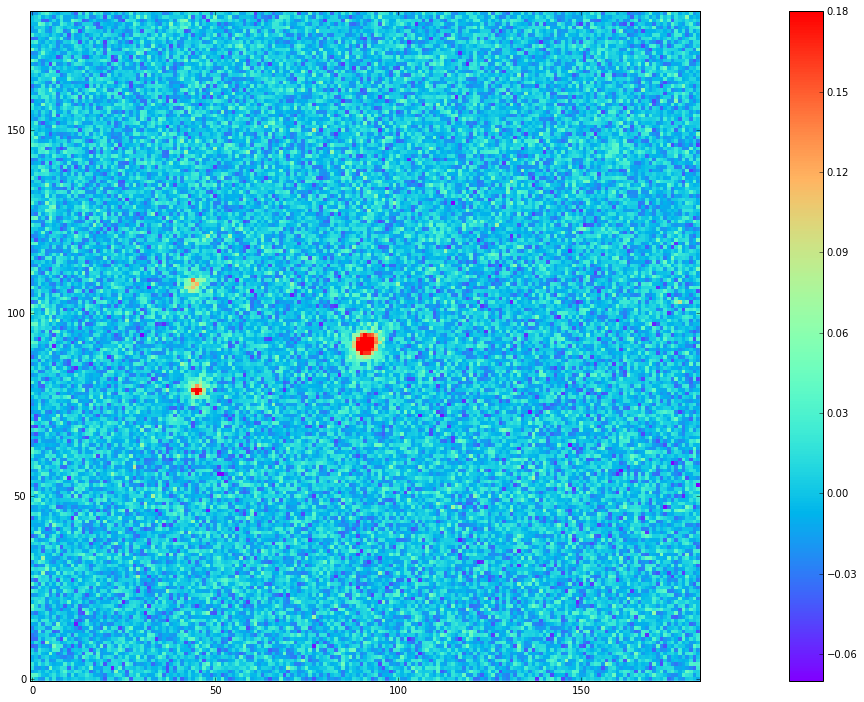

('max: ', 0.71289062, 'sum: ', 9.4595985)
Matched-scale SUM


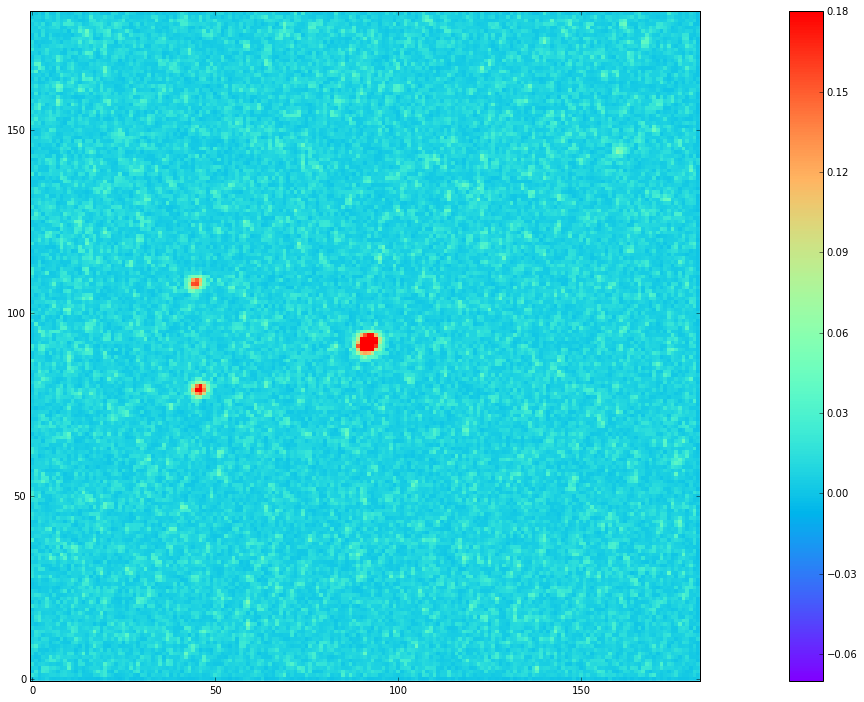

('max: ', 0.73658402076441809, 'sum: ', 350.85434309240605)


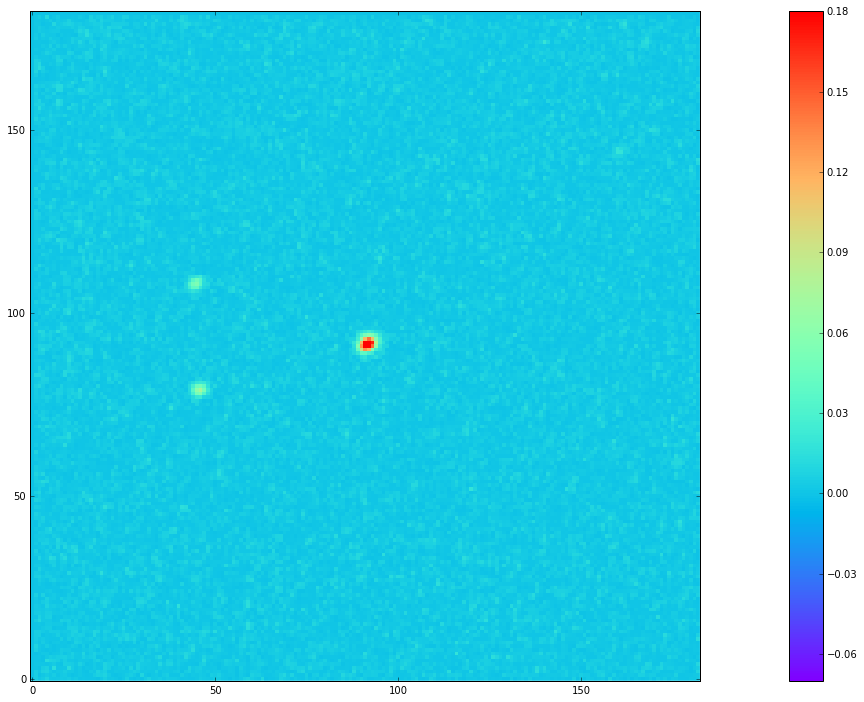

('max: ', 0.23886032124365225, 'sum: ', 112.50746208695394)


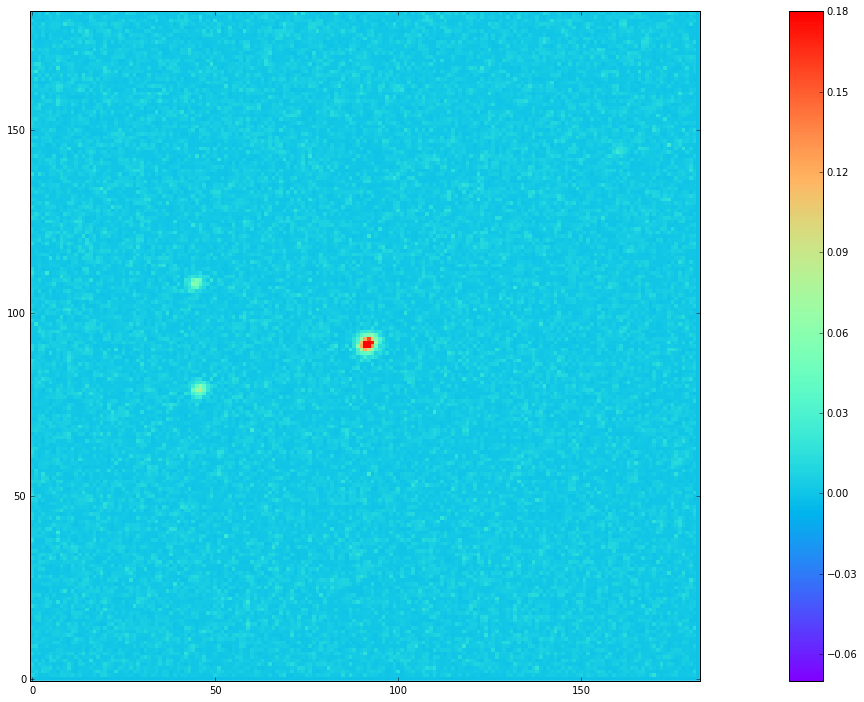

('max: ', 0.25480257894248798, 'sum: ', 127.34266063133019)


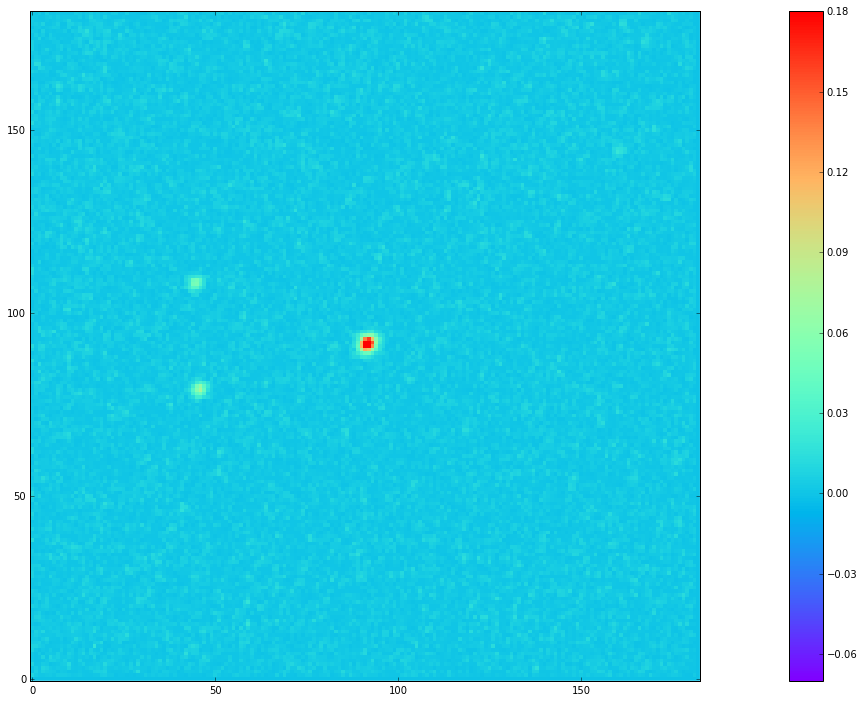

('max: ', 0.24292112057827786, 'sum: ', 111.00422037412199)
SUM


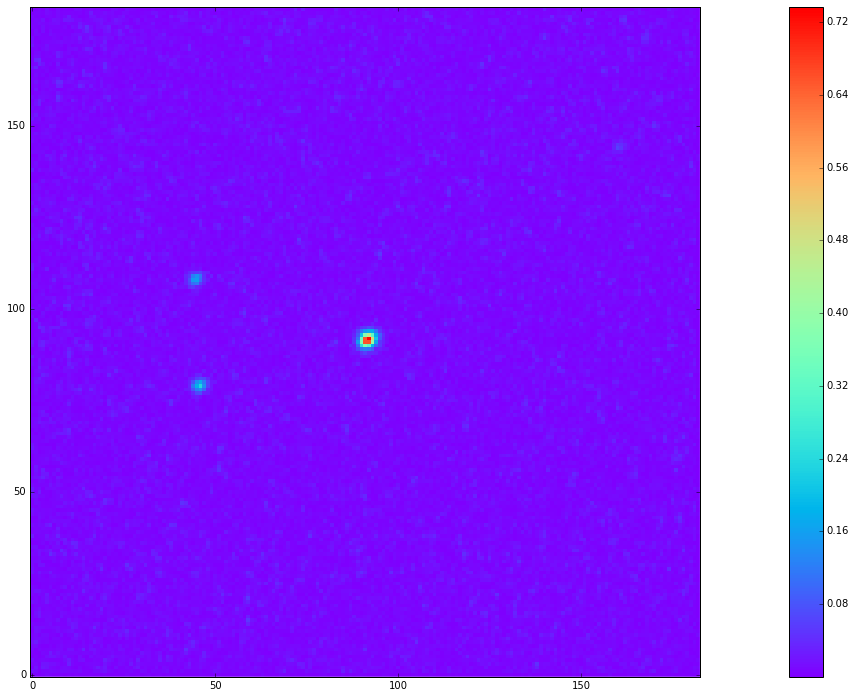

('max: ', 0.73658402076441809, 'sum: ', 350.85434309240605)
DIFF last - first


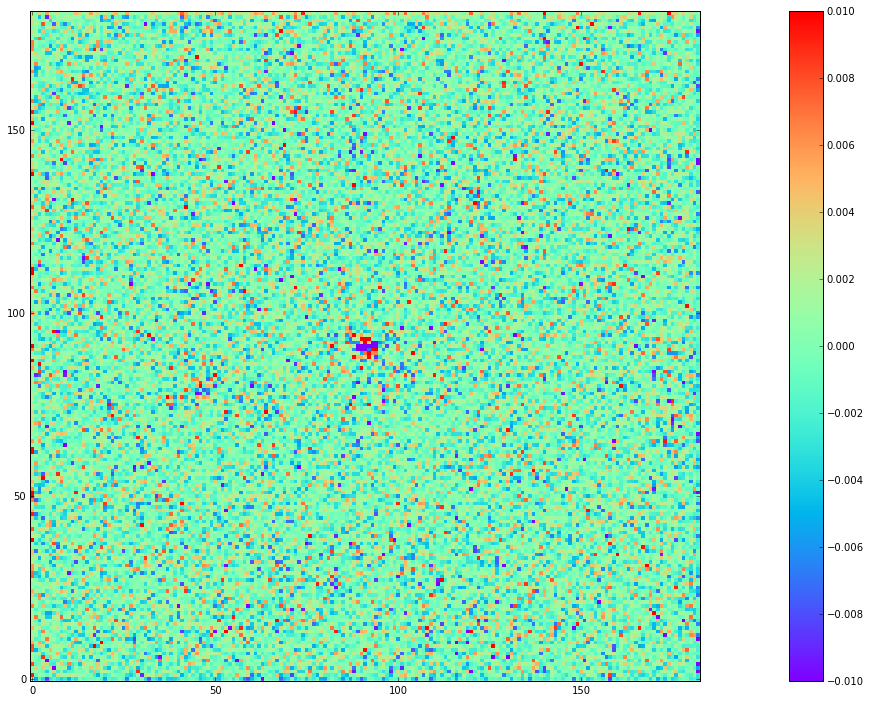

DIFF second - first


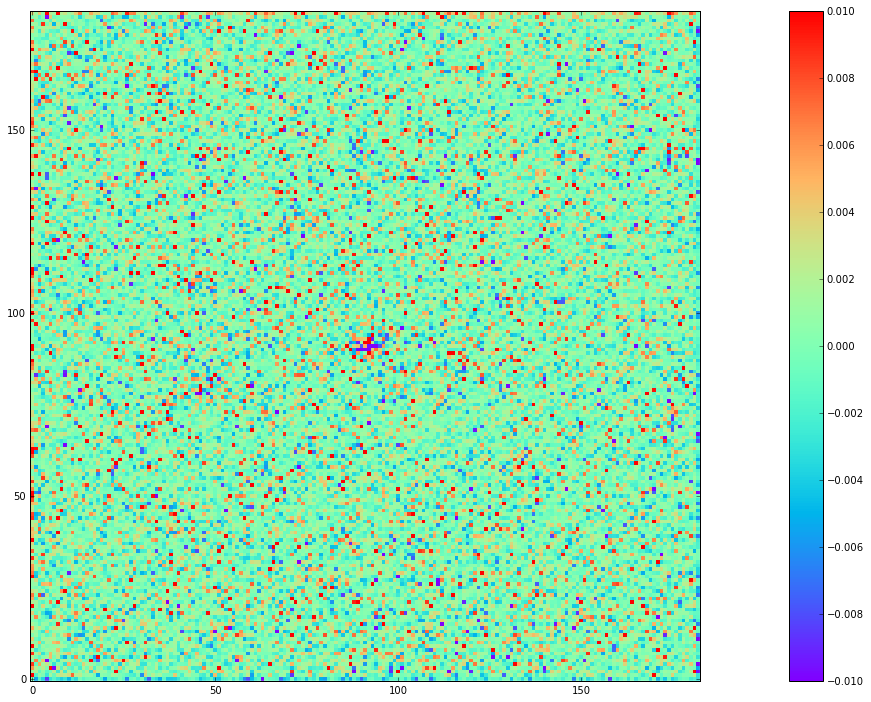

DIFF last - second to last


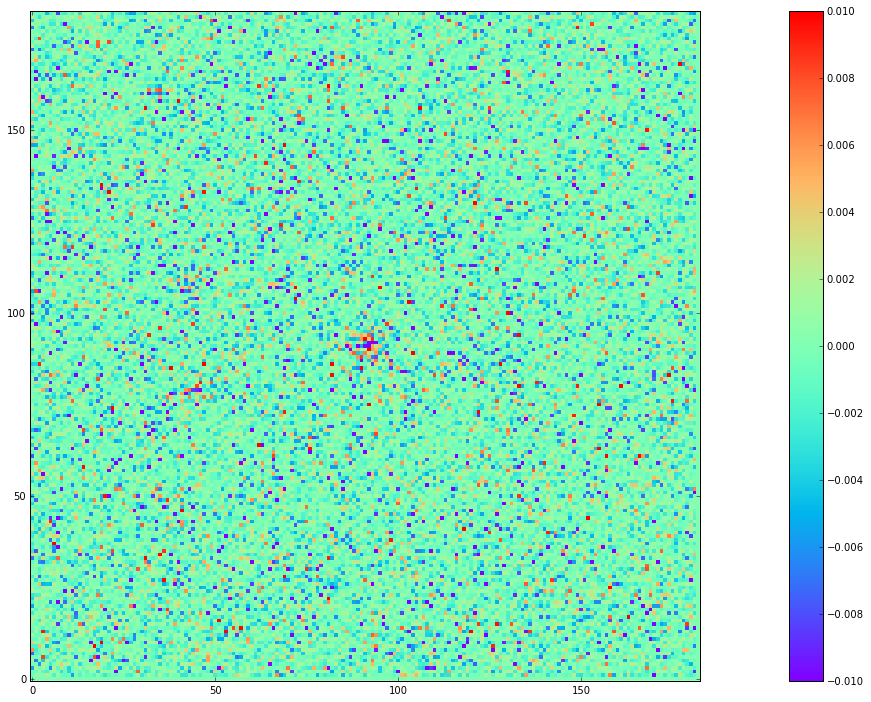

In [60]:
ref_im = self.exposures[0].getMaskedImage().getImage().getArray()
min_use = np.min([np.min(ref_im),50.])
max_use = 0.18
look(ref_im, range=[min_use,max_use])
print("max: ", np.max(ref_im), "sum: ", np.sum(ref_im))
rescale = 1.
sum_im = np.sum([self.model[_i]*rescale for _i in range(self.n_step)],axis=0)
print("Matched-scale SUM")
look(sum_im, range=[min_use,max_use])
print("max: ", np.max(sum_im), "sum: ", np.sum(sum_im))
for _i in range(self.n_step):
    look(self.model[_i]*rescale, range=[min_use,max_use])
    print("max: ", np.max(self.model[_i]*rescale),
          "sum: ", np.sum(self.model[_i]*rescale))
print("SUM")
look(sum_im)
print("max: ", np.max(sum_im), "sum: ", np.sum(sum_im))

diff_range = [-0.01, 0.01]
print("DIFF last - first")
look((self.model[-1] - self.model[0])*rescale, range=diff_range)
print("DIFF second - first")
look((self.model[1] - self.model[0])*rescale, range=diff_range)
print("DIFF last - second to last")
look((self.model[-1] - self.model[-2])*rescale, range=diff_range)

In [49]:
output_directory=repository
template_exposure_gen = self.generate_templates_from_model(obsids=obsid_list,output_repository=None,
                                                           warp=False, output_obsid_offset=1000)
im_arr = []
for exp in template_exposure_gen:
    im_arr.append(exp.getMaskedImage().getImage().getArray())

Working on observation 1 ... Done!
Working on observation 2 ... Done!
Working on observation 4 ... Done!
Working on observation 6 ... Done!
Working on observation 7 ... Done!


In [50]:
ii = 0
for exp in self.exposures:
    print("Working on observation %i" % ii)
    ii += 1
    psf = exp.getPsf()
    psf.computeShape()
    shape = psf.computeShape()
    print(shape.getIxx()+shape.getIyy())

Working on observation 0
9.27096839986
Working on observation 1
7.10147614616
Working on observation 2
6.31992623004
Working on observation 3
6.66927318937
Working on observation 4
7.17197263135


In [56]:
i=5
look(self.exposures[i].getImage().getArray() - im_arr[i])
look(self.exposures[i].getImage().getArray())

IndexError: list index out of range